## КМ5

 На занятиях рассматривались классы Card – игральная карта и Deck – карточная колода.
 10000 сдаются пять карт (см. главу 11 присланного материала). Вычислить частоты
 появления в этой колоде трех, четырех и пяти карт одной масти и одного старшинства.

Вероятности
{3: 0.0482, 4: 0.0007, 5: 0.0}
{3: 0.3104, 4: 0.0333, 5: 0.0014}


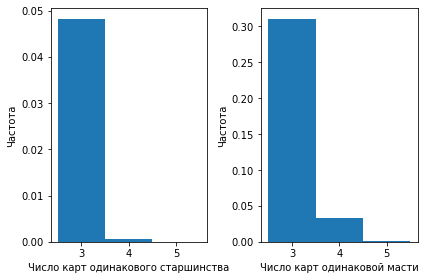

In [2]:
import random
import matplotlib.pyplot as plt


class Card:

    ranks = ('6', '7', '8', '9', '10', 'В', 'Д', 'К', 'Т')
    suits = ('\u2660', '\u2663', '\u2666', '\u2665')
    mes = 'Неккоректное старшинство и/или масть карты: ({}, {})'

    def __init__(self, rank, suit):
        if (rank not in self.ranks) or (suit not in self.suits):
            raise ValueError(Card.mes.format(rank, suit))
        self.rank = rank
        self.suit = suit

    def __repr__(self):
        return f'{self.rank}{self.suit}'

    def __str__(self):
        return f'{self.rank}{self.suit}'


class Deck:

    def __init__(self):
        self.deck = [Card(rank, suit) for rank in Card.ranks for suit in Card.suits]

    def __len__(self):
        return len(self.deck)

    def shuffle(self):
        random.shuffle(self.deck)

    def __repr__(self):
        return ' | '.join(map(str, self.deck))

    def __str__(self):
        return self.__repr__()

    def deal(self, n):
        l = len(self)
        if n <= l:
            dealed = self.deck[:n]
            self.deck = self.deck[n:]
            return dealed
        else:
            raise ValueError(f'Нельзя сдать {n} из колоды с {l} картами')

class Game:
    def __init__(self, m=10000, n=5):
        self.m = m
        self.n = n

    def deal_rank(self):
        ranks = Card.ranks
        suits = Card.suits
        deals_r = []
        deals_s = []
        for _ in range(self.m):
            deck = Deck()
            deck.shuffle()
            deck_n = deck.deal(self.n)
            same_rank = {r:0 for r in ranks}
            same_suit = {s:0 for s in suits}
            for c in deck_n:
                same_rank[c.rank] += 1
                same_suit[c.suit] += 1
            deals_r.append(same_rank)
            deals_s.append(same_suit)
        return deals_r, deals_s

    def dist_ranks(self, deals):
        #same_ranks = {n:0 for n in range(1, sum(deals[0].values())+1)} Число одинаковых карт (среди всех)
        same_ranks = {3:0, 4:0, 5:0} # Только 3, 4 и 5 одинаковых карт
        for deal in deals:
            vals = list(deal.values())
            max_val = max(vals)
            if max_val in same_ranks.keys():
                same_ranks[max_val] += 1
        s = len(deals)
        for r in same_ranks.keys():
            same_ranks[r] /= s
        return same_ranks

    def draw(self):
        fig = plt.figure()
        ax1 = fig.add_subplot(1, 2, 1)
        ax1.set_xlabel('Число карт одинакового старшинства')
        ax1.set_ylabel('Частота')
        ax2 = fig.add_subplot(1, 2, 2)
        ax2.set_xlabel('Число карт одинаковой масти')
        ax2.set_ylabel('Частота')

        d_r, d_s = self.deal_rank()
        res_r = self.dist_ranks(d_r)
        res_s = self.dist_ranks(d_s)
        print('Вероятности' ,res_r, res_s, sep='\n')
        ax1.bar(res_r.keys(), res_r.values(), width=1)
        ax2.bar(res_s.keys(), res_s.values(), width=1)
        plt.tight_layout()
        plt.show()
        
    def __call__(self, m, n):
        self.m = m
        self.n = n
        self.draw()

game = Game()
game(10000, 5)